# Imports and APIs

### APIs to test:
- [URLScan](https://urlscan.io)
    - pip install urlscanio


In [79]:
# %pip install urlscanio
# %pip install python-dotenv
# %pip install requests
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 44.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 48.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import dotenv
import os
import requests
import json

dotenv.load_dotenv('.env')

urlscan_api_key = os.getenv('URLScan_API_Key')



# Collect URL Scan Data

In [10]:
headers_urlscan = {
    'API-Key': urlscan_api_key,
    'Content-Type': 'application/json'
}
url_to_scan = 'https://monkeytype.com/'
data_urlscan = {
    "url": url_to_scan, 
    "visibility": "public"
}
response = requests.post('https://urlscan.io/api/v1/scan/',headers=headers_urlscan, data=json.dumps(data_urlscan))

response.json()

{'code': 'validationerror',
 'message': 'Missing reCaptcha Token',
 'status': 400,
 'errors': [{'code': 'validationerror',
   'title': 'Missing reCaptcha Token',
   'detail': 'Missing reCaptcha Token',
   'status': 400}]}

In [11]:
r = requests.get('https://urlscan.io/api/v1/result/' + 'd5587f5b-aae8-4b53-8190-1cba351d3d10/')
r.json()

{'data': {'requests': [{'request': {'requestId': '1E9D51CE97BE030BFA8F6C190F8D2776',
     'loaderId': '1E9D51CE97BE030BFA8F6C190F8D2776',
     'documentURL': 'https://monkeytype.com/',
     'request': {'url': 'https://monkeytype.com/',
      'method': 'GET',
      'headers': {'Upgrade-Insecure-Requests': '1',
       'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.5993.117 Safari/537.36',
       'accept-language': 'de-DE,de;q=0.9'},
      'mixedContentType': 'none',
      'initialPriority': 'VeryHigh',
      'referrerPolicy': 'strict-origin-when-cross-origin',
      'isSameSite': True},
     'timestamp': 34971507.211877,
     'wallTime': 1698642895.530673,
     'initiator': {'type': 'other'},
     'redirectHasExtraInfo': False,
     'type': 'Document',
     'frameId': 'E7AF8FB7E2EED9B58D716FB67C370229',
     'hasUserGesture': False,
     'primaryRequest': True},
    'response': {'encodedDataLength': 21364,
     'dataLength': 1

True

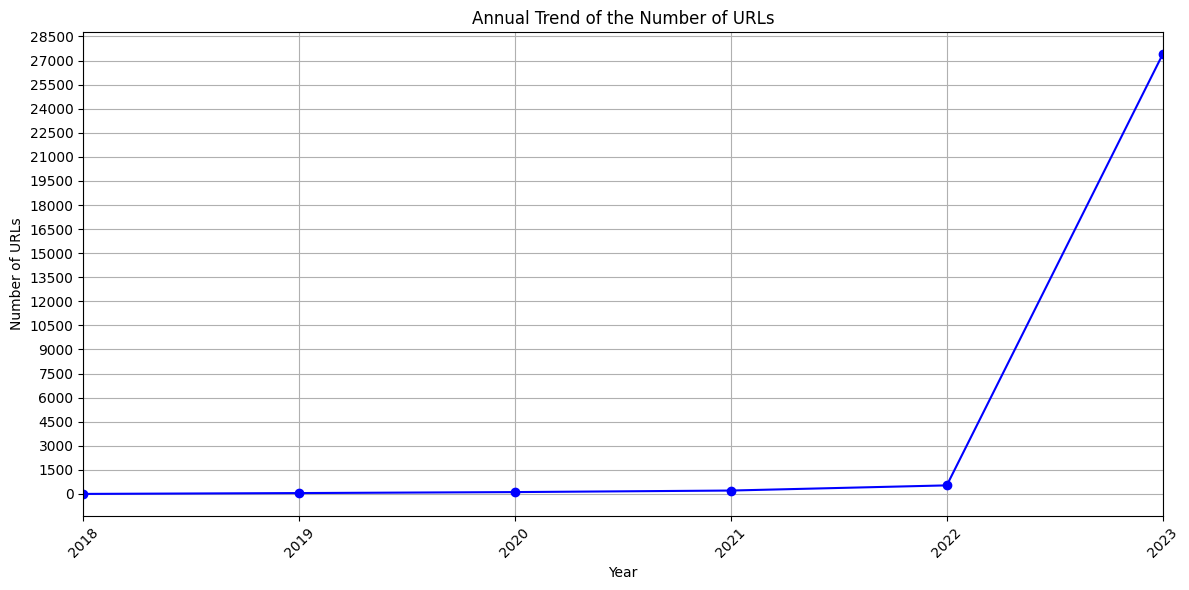

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('urlHausDatadump.csv')
# print(df_active_urls.head())

# Checking if the data is a DataFrame
if isinstance(data, pd.DataFrame):
    # Convert 'dateadded' to datetime format if it's not already
    if not pd.api.types.is_datetime64_any_dtype(data['dateadded']):
        data['dateadded'] = pd.to_datetime(data['dateadded'])

    # Group by Year and count the number of URLs
    monthly_counts = data.groupby(data['dateadded'].dt.to_period('Y')).size()

    # Plotting
    plt.figure(figsize=(12, 6))
    monthly_counts.plot(kind='line', marker='o', color='b')
    plt.title('Annual Trend of the Number of URLs')
    plt.xlabel('Year')
    plt.ylabel('Number of URLs')
    # plt.ylim(0, 12000)
    plt.yticks(range(0, 30000, 1500)) # Set ticks every 500
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot
    plot_success = True
else:
    plot_success = False

plot_success







In [82]:
from sklearn.feature_extraction.text import CountVectorizer
data['tags_clean'] = data['tags'].fillna('').str.lower().str.replace('[^\w\s]', '', regex=True)

# Count the frequency of each tag
vectorizer = CountVectorizer()
tags_counts = vectorizer.fit_transform(data['tags_clean'])
tags_sum = tags_counts.sum(axis=0)
tags_freq = [(word, tags_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
tags_freq = sorted(tags_freq, key=lambda x: x[1], reverse=True)

# Extract and print the top 20 most frequent tags
top_20_tags = tags_freq[:20]
for tag, count in top_20_tags:
    print(f"{tag}: {count}")



elfmirai: 2822
hajime: 2265
32bitelfmipsmozi: 1382
ta577tr: 1360
pikabotta577tr: 1173
ta544: 1024
elfmozi: 920
darkgateta577tr: 808
androidapk: 712
irata: 707
mozi: 695
elf: 652
pikabotta577trzip: 574
pikabottr: 418
gatinggootloader: 397
darkgatetr: 360
darkgatepdfta577tr: 327
dllrecordbreaker: 322
dllstealc: 301
32armelfmirai: 290


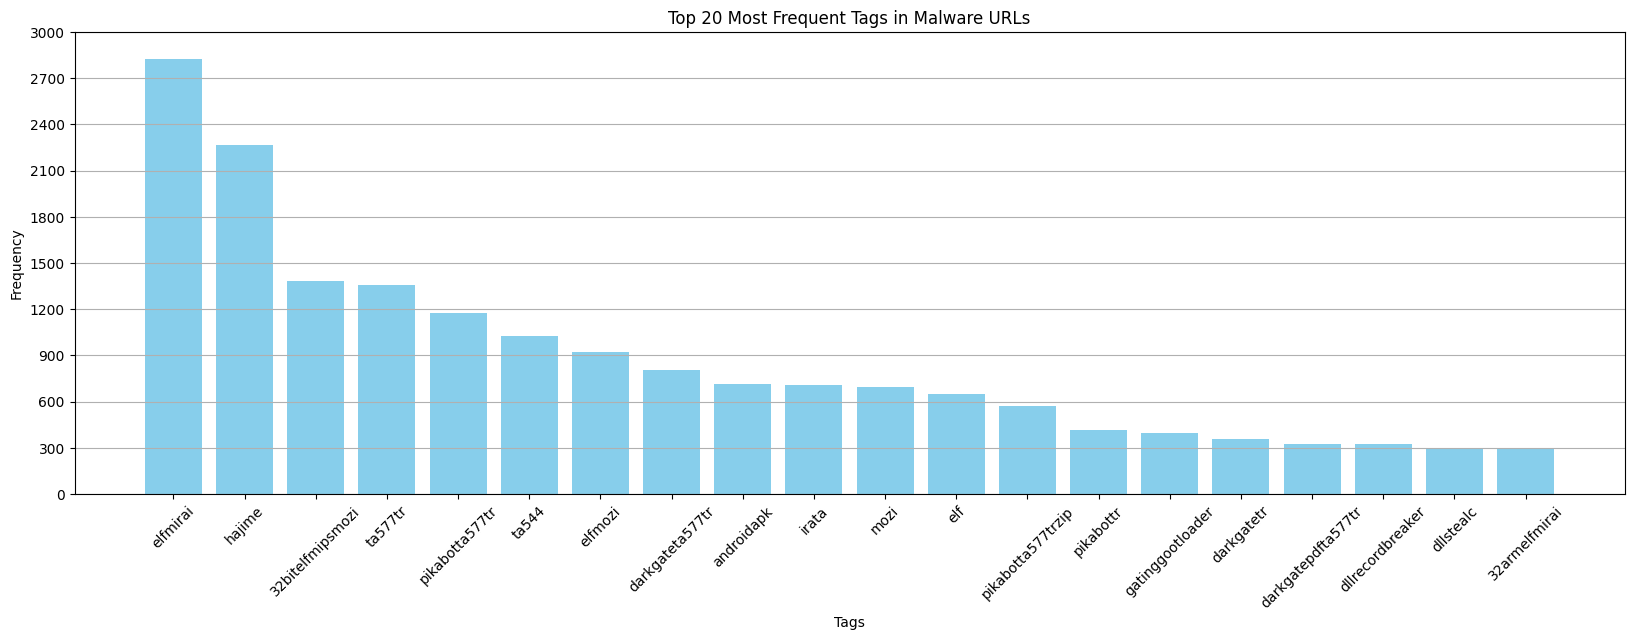

In [86]:
import numpy as np

tags, counts = zip(*top_20_tags)


plt.figure(figsize=(20, 6))
plt.bar(tags, counts, color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.yticks(range(0, 3001, 300))
plt.title('Top 20 Most Frequent Tags in Malware URLs')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()
